In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np

In [3]:
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                   [ 0.,  1., -1.]])

In [10]:
ss = StandardScaler()

In [12]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
tf_data = ss.transform(X_train)

In [8]:
np.mean(tf_data[:,0])

0.0

In [9]:
np.std(tf_data[:,0])

0.9999999999999999

In [14]:
import pandas as pd

In [16]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/machine-learning-for-beginners/master/data/HR_comma_sep.csv')

In [17]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [18]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

In [20]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [21]:
hr_data.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [23]:
le = LabelEncoder()

In [24]:
hr_data['dept_tf'] = le.fit_transform(hr_data.dept)

In [26]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,dept_tf
0,0.38,0.53,2,157,3,0,1,0,sales,low,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,7


In [28]:
ohe = OneHotEncoder()

In [39]:
o = ohe.fit_transform(hr_data[['dept_tf']]).toarray()

In [37]:
ohe.active_features_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [38]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [44]:
hr_dept_data = pd.DataFrame(o, columns=le.classes_)

In [48]:
res = pd.concat([hr_data, hr_dept_data])

In [50]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29998 entries, 0 to 14998
Data columns (total 21 columns):
IT                       14999 non-null float64
RandD                    14999 non-null float64
Work_accident            14999 non-null float64
accounting               14999 non-null float64
average_montly_hours     14999 non-null float64
dept                     14999 non-null object
dept_tf                  14999 non-null float64
hr                       14999 non-null float64
last_evaluation          14999 non-null float64
left                     14999 non-null float64
management               14999 non-null float64
marketing                14999 non-null float64
number_project           14999 non-null float64
product_mng              14999 non-null float64
promotion_last_5years    14999 non-null float64
salary                   14999 non-null object
sales                    14999 non-null float64
satisfaction_level       14999 non-null float64
support                  1499

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2grey
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
img = imread('Beer.jpg')

In [55]:
img.shape

(526, 793, 3)

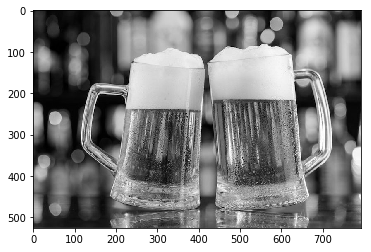

In [63]:
plt.imshow(rgb2grey(img), cmap='gray')

In [64]:
from sklearn.preprocessing import FunctionTransformer

In [65]:
ft = FunctionTransformer(lambda x: x+2)

In [66]:
X = np.array([[1,2],[3,4]])

In [67]:
ft.transform(X)

array([[3, 4],
       [5, 6]])